In [12]:
from drawdata import draw_scatter # ? data generation
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_curve,precision_score

import numpy as np
import matplotlib.pyplot as plt

In [13]:
draw_scatter()

In [14]:
df = pd.read_csv("./data/curve_example.csv")

In [17]:
def get_fp_tp(y, proba, threshold):
	"""Возвращает количество долей ложно положительных и истинно положительных."""
	# источник: https://towardsdatascience.com/roc-curve-explained-50acab4f7bd8
	# Разносим по классам
	pred = pd.Series(np.where(proba>=threshold, 1, 0),
                 	dtype='category')
	pred.cat.set_categories([0,1])
	# Создаём матрицу ошибок
	confusion_matrix = pred.groupby([y, pred]).size().unstack()\
                           .rename(columns={0: 'pred_0',
      	                                  1: 'pred_1'},
                                   index={0: 'actual_0',
                                          1: 'actual_1'})
	false_positives = confusion_matrix.loc['actual_0', 'pred_1']
	true_positives = confusion_matrix.loc['actual_1', 'pred_1']
	return false_positives, true_positives
# train / test split на примере сгенерированного датасета
X = df[["x", "y"]].values
Y = df["z"].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
y_test = np.array([1 if p=="a" else 0 for p in y_test])
y_train = np.array([1 if p=="a" else 0 for p in y_train])
# создаём модель
lgr = LogisticRegression()
lgr.fit(X_train, y_train)

LogisticRegression()

KeyError: 'pred_1'

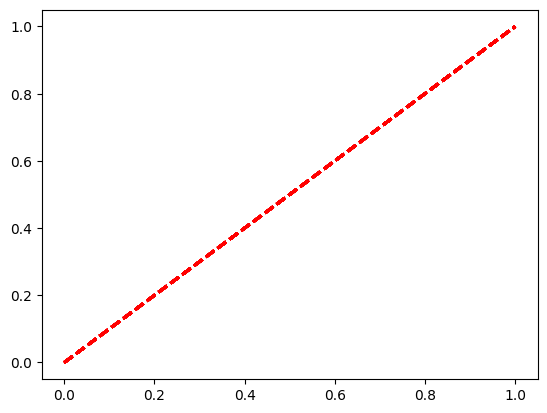

In [19]:
y_hat = lgr.predict_proba(X_test)[:,1]
thresholds = np.linspace(0, 1, 100)

# defining fpr and tpr
tpr = []
fpr = []
# определяем положительные и отрицательные
positives = np.sum(y_test==1)
negatives = np.sum(y_test==0)
# перебираем пороговые значения и получаем количество ложно и истинно положительных результатов 
for th in thresholds:
	fp,tp = get_fp_tp(y_test, y_hat, th)
	tpr.append(tp/positives)
	fpr.append(fp/negatives)
	plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Random', alpha=.8)
plt.plot(fpr,tpr, label="ROC Curve",color="blue")
plt.text(0.5, 0.5, "varying threshold scores (0-1)", rotation=0, size=12,ha="center", va="center",bbox=dict(boxstyle="rarrow"))
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()